# <center>Тема 2. Углубленные приемы pandas, collections, numpy</center>
## <center>Часть 2. Работа с векторами в библиотеке NumPy</center>

**Numpy** - это библиотека Python для вычислительно эффективных операций с многомерными массивами, предназначенная в основном для научных вычислений.

In [1]:
import numpy as np

In [2]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

**Зачем NumPy?:** Эффективность базовых операций 


In [3]:
L = range(1_000_000)

In [4]:
%timeit [i**2 for i in L]

274 ms ± 28.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
a = np.arange(1_000_000)

In [6]:
%timeit a**2

2.38 ms ± 309 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Интерактивная справка


In [7]:
?np.array

поиск в документации


In [8]:
np.lookfor('create array') 

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.lib.Arrayterator
    Buffered iterator for big arrays.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.ma.MaskedArray.__new__
    Create a 

In [9]:
np.con*?

#### Библиотеку принято импортировать так

In [10]:
import numpy as np

## Создание массивов

* **1-D**:


In [11]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [12]:
type(a)

numpy.ndarray

In [13]:
a.ndim

1

In [14]:
a.shape[0]

4

In [15]:
len(a)

4

* **2-D, 3-D, ...**:


In [16]:
b = np.array([[0, 1, 2], 
              [3, 4, 5]]) # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [17]:
b.ndim

2

In [18]:
b.shape

(2, 3)

In [19]:
len(b) # returns the size of the first dimension

2

In [20]:
c = np.array([[[1], [2]], 
              [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [21]:
c.shape

(2, 2, 1)

## Методы для создания массивов

На практике элементы не добавляются по одному

- Равномерно распределенные элементы:

In [22]:
a = range(10)
type(a)

range

In [23]:
a = np.arange(10) # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
b = np.arange(1, 9, 2) # start, end (exclusive), step
b

array([1, 3, 5, 7])

In [25]:
c = np.arange(0.1, 1, 0.25) # supports float
c

array([0.1 , 0.35, 0.6 , 0.85])

In [26]:
try:
    range(0.1, 1, 0.25)
except TypeError as te:
    print(f'TypeError: {te}')

TypeError: 'float' object cannot be interpreted as an integer


- по числу элементов:


In [27]:
c = np.linspace(0, 1, 6) # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [28]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

- Часто встречающиеся массивы:


In [29]:
a = np.ones((3, 3)) # (3, 3) is a tuple, np.ones(3, 3) = Error
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [30]:
b = np.zeros((2, 2))
b

array([[0., 0.],
       [0., 0.]])

In [31]:
c = np.eye(3, M=3, k=0)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [32]:
d = np.diag([1, 2, 3, 4])
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [33]:
e = np.full((2,2), 7)
e

array([[7, 7],
       [7, 7]])

* `np.random` генерация случайных чисел (Mersenne Twister PRNG):

In [34]:
a = np.random.random(10) * 10
a

array([5.07555068, 0.21193302, 4.33521758, 4.46313056, 2.38819989,
       8.30245732, 7.44764177, 5.86479001, 4.92867853, 4.8735588 ])

In [35]:
# uniform in [0, 1]
a = np.random.rand(2, 2, 1000) # shape not tuple
a

array([[[0.2667407 , 0.6050111 , 0.75354372, ..., 0.29075972,
         0.22819075, 0.50373916],
        [0.93195716, 0.57412978, 0.98974462, ..., 0.6166964 ,
         0.20206543, 0.8798323 ]],

       [[0.99700835, 0.78371877, 0.72519434, ..., 0.25213599,
         0.55433779, 0.24377034],
        [0.95454935, 0.43772749, 0.6299872 , ..., 0.3097446 ,
         0.26240188, 0.7231957 ]]])

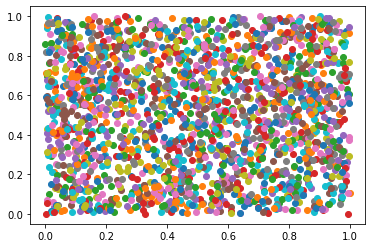

In [36]:
import matplotlib.pyplot as plt
plt.plot(a[0], a[1], 'o');

In [37]:
# Gaussian
b = np.random.randn(2, 4, 1000) # again - shape not tuple
b  

array([[[ 0.04582291, -1.38490144, -0.74138244, ...,  1.42111202,
          1.07490464, -0.69299527],
        [ 1.72313929,  1.37522074, -0.27319963, ..., -1.02175461,
          1.10108536, -0.41873646],
        [-1.00566143, -0.40600286, -1.4198771 , ...,  2.36150647,
         -1.35470647,  0.69969936],
        [-0.06564798, -1.29399419, -1.14199386, ...,  1.21259492,
         -0.81257763,  1.30207641]],

       [[ 0.40228363, -1.1010597 ,  0.30557706, ...,  0.80713645,
         -1.00611917, -0.93443409],
        [-0.9651352 , -0.67984285,  0.06595279, ...,  0.79857043,
          0.3639341 ,  0.0263856 ],
        [ 0.08806805, -1.02160072,  0.68592984, ..., -1.59161216,
          0.90707427,  0.30871228],
        [-2.18746432,  0.68913569,  1.76519698, ..., -0.1741715 ,
         -0.66563179,  1.12409347]]])

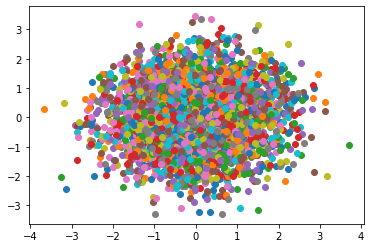

In [38]:
plt.plot(b[0], b[1], 'o');

Random seed

In [39]:
np.random.seed(1234)        # Setting the random seed
np.random.randint(10, size=10)

array([3, 6, 5, 4, 8, 9, 1, 7, 9, 6])

In [40]:
np.random.randint(10, size=10)

array([8, 0, 5, 0, 9, 6, 2, 0, 5, 2])

In [41]:
np.random.seed(1234)        # Must repeat again
np.random.randint(10, size=10)

array([3, 6, 5, 4, 8, 9, 1, 7, 9, 6])

## Основные типы данных NumPy

Точка после числа означает, что это тип данных `float64`


In [42]:
a = np.array([1, 2, 3])
a.dtype

dtype('int32')

In [43]:
b = np.array([1., 2., 3.])
b.dtype

dtype('float64')

Можно задать тип данных явно. По умолчанию - `float64`

In [44]:
c = np.array([1, 2, 3], dtype=float)
c.dtype, c

(dtype('float64'), array([1., 2., 3.]))

In [45]:
d = np.ones((3, 3))
d.dtype, a

(dtype('float64'), array([1, 2, 3]))

Прочие типы данных:

- Комплексные числа


In [46]:
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype

dtype('complex128')

 - Bool


In [47]:
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

- Строки

На строки память выделяется "жадно" - по максимальному числу литер в строке. 
В этом примере на каждую строку выделяется по 7 литер, и тип данных - 'S7'

In [48]:
f = np.array(['Bonjour', 'Hello', 'Hallo',])
f.dtype # <--- strings containing max. 7 letters

dtype('<U7')

## Основы визуализации

Импортируем *Matplotlib*


In [49]:
import matplotlib.pyplot as plt

 - Отображение одномерных массивов:

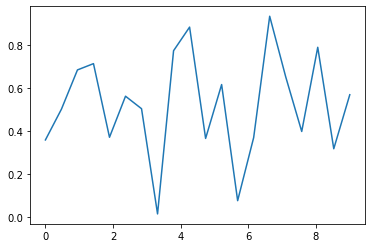

In [50]:
x = np.linspace(0, 9, 20)
y = np.random.rand(20)
plt.plot(x, y)       # line plot    
plt.show()           

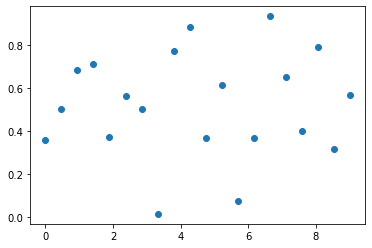

In [51]:
plt.plot(x, y, 'o')  # dot plot    

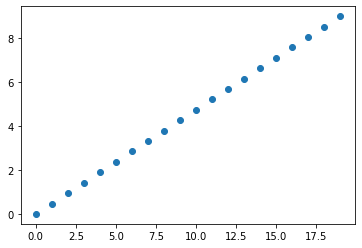

In [52]:
plt.plot(x, 'o')  # dot plot    

- Отображение двухмерных массивов (например, изображений):


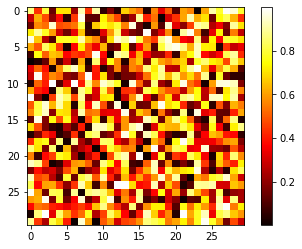

In [53]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()    

## Индексирование массивов и срезы

В целом так же, как со встроенными последовательностями Python (например, как со списками).


In [54]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [55]:
a[0], a[2], a[-1]

(0, 2, 9)

Работает и популярный в Python способ отражения массива:


In [56]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

Для многомерных массивов индексы - это кортежи целых чисел


In [57]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [58]:
a[1, 1]

1

In [59]:
a[2, 1] = 10 # third line, second column
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [60]:
a.T[0] = -1
a

array([[-1,  0,  0],
       [-1,  1,  0],
       [-1, 10,  2]])

In [61]:
a[:, 1]

array([ 0,  1, 10])

**Срезы**

In [62]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [63]:
a[2:9:3] # [start:end:step]

array([2, 5, 8])

Последний индекс не включается

In [64]:
a[:4]

array([0, 1, 2, 3])

По умолчанию \`start\` -  0,
\`end\` - индекс последнего элемента, \`step\` - 1:


In [65]:
a[1:3]

array([1, 2])

In [66]:
a[::2]

array([0, 2, 4, 6, 8])

In [67]:
a[1::2]

array([1, 3, 5, 7, 9])

In [68]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

Можно совмещать присваивание и срез:


In [69]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [70]:
b = np.arange(5)
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

## Индексирование масками

In [71]:
np.random.seed(3)
a = np.random.randint(0, 20, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 12,  7, 14, 17])

In [72]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True,  True, False, False, False])

In [73]:
mask = (a % 3 == 0)
extract_from_a = a[mask] # or,  a[a%3==0]
extract_from_a           # extract a sub-array with the mask

array([ 3,  0,  9,  6,  0, 12])

Индексирование маской может быть очень полезным для присваивания значений части элементов массива:


In [74]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, -1,  7, 14, 17])

### Индексирование массивом целых чисел

In [75]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [76]:
a[np.array([2, 3, 2, 4, 2])]  # note: [2, 3, 2, 4, 2] is a Python list

array([20, 30, 20, 40, 20])

In [77]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

In [78]:
a = np.arange(10, 20)
a

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [79]:
idx = np.array([[3, 4], [9, 7]])
display(idx.shape)
display(idx)

(2, 2)

array([[3, 4],
       [9, 7]])

In [80]:
a[idx]

array([[13, 14],
       [19, 17]])

### Изменение формы

In [81]:
a = np.floor(10*np.random.random((3,4)))
a

array([[3., 4., 9., 7.],
       [9., 4., 5., 3.],
       [5., 2., 4., 7.]])

In [82]:
a.T

array([[3., 9., 5.],
       [4., 4., 2.],
       [9., 5., 4.],
       [7., 3., 7.]])

In [83]:
a.reshape(4, -1) # outofplace

array([[3., 4., 9.],
       [7., 9., 4.],
       [5., 3., 5.],
       [2., 4., 7.]])

In [84]:
a.resize(2, 6) # inplace
a

array([[3., 4., 9., 7., 9., 4.],
       [5., 3., 5., 2., 4., 7.]])

In [85]:
a.ravel()

array([3., 4., 9., 7., 9., 4., 5., 3., 5., 2., 4., 7.])

### Работа с несколькими массивами

Базовые операции

In [86]:
a = [1, 2, 3, 4]
b = [5, 6, 7, 8]
a + b # остальные не определены
try:
    a - b
except TypeError as te:
    print(f'TypeError: {te}')
    try:
        a * b
    except TypeError as te:
        print(f'TypeError: {te}')
        try:
            a / b
        except TypeError as te:
            print(f'TypeError: {te}')    

TypeError: unsupported operand type(s) for -: 'list' and 'list'
TypeError: can't multiply sequence by non-int of type 'list'
TypeError: unsupported operand type(s) for /: 'list' and 'list'


In [87]:
# для ndarray операции выполняются поэлементно
a = np.array(a)
b = np.array(b)

a + b, a - b, a * b, a / b

(array([ 6,  8, 10, 12]),
 array([-4, -4, -4, -4]),
 array([ 5, 12, 21, 32]),
 array([0.2       , 0.33333333, 0.42857143, 0.5       ]))

Произведение векторов и матриц

In [88]:
a.dot(b) # == np.dot(a, b)

70

In [89]:
x = np.array([[1, 2, 3, 4], 
              [5, 6, 7, 8]])
x.dot(a)

array([30, 70])

In [90]:
x.dot(x.T)

array([[ 30,  70],
       [ 70, 174]])

Объединение массивов

In [91]:
a = np.random.randint(10, size=(2,2))
a

array([[0, 5],
       [4, 1]])

In [92]:
b = np.random.randint(10, size=(2,2))
b

array([[5, 4],
       [7, 6]])

In [93]:
np.vstack((a, b))

array([[0, 5],
       [4, 1],
       [5, 4],
       [7, 6]])

In [94]:
np.hstack((a, b))

array([[0, 5, 5, 4],
       [4, 1, 7, 6]])

In [95]:
np.concatenate((a, b), axis=0)

array([[0, 5],
       [4, 1],
       [5, 4],
       [7, 6]])

In [96]:
np.concatenate((a, b), axis=1)

array([[0, 5, 5, 4],
       [4, 1, 7, 6]])

Broadcasting

In [97]:
a = np.random.randint(10, size=(10,5))
a

array([[0, 0, 9, 2, 4],
       [5, 8, 8, 7, 5],
       [1, 1, 1, 5, 5],
       [7, 4, 3, 0, 0],
       [0, 0, 2, 2, 7],
       [0, 5, 0, 1, 4],
       [1, 2, 2, 4, 8],
       [0, 6, 0, 4, 1],
       [5, 1, 8, 8, 7],
       [0, 0, 9, 1, 7]])

In [98]:
b = np.random.randint(10, size=5)
b

array([8, 7, 4, 0, 0])

In [99]:
a + b

array([[ 8,  7, 13,  2,  4],
       [13, 15, 12,  7,  5],
       [ 9,  8,  5,  5,  5],
       [15, 11,  7,  0,  0],
       [ 8,  7,  6,  2,  7],
       [ 8, 12,  4,  1,  4],
       [ 9,  9,  6,  4,  8],
       [ 8, 13,  4,  4,  1],
       [13,  8, 12,  8,  7],
       [ 8,  7, 13,  1,  7]])

### Прочее

In [100]:
a

array([[0, 0, 9, 2, 4],
       [5, 8, 8, 7, 5],
       [1, 1, 1, 5, 5],
       [7, 4, 3, 0, 0],
       [0, 0, 2, 2, 7],
       [0, 5, 0, 1, 4],
       [1, 2, 2, 4, 8],
       [0, 6, 0, 4, 1],
       [5, 1, 8, 8, 7],
       [0, 0, 9, 1, 7]])

Максимум

In [101]:
a.max()

9

In [102]:
a.max(axis=0)

array([7, 8, 9, 8, 8])

In [103]:
a.max(axis=1)

array([9, 8, 5, 7, 7, 5, 8, 6, 8, 9])

Индекс максимума

In [104]:
a.argmax()

2

In [105]:
a

array([[0, 0, 9, 2, 4],
       [5, 8, 8, 7, 5],
       [1, 1, 1, 5, 5],
       [7, 4, 3, 0, 0],
       [0, 0, 2, 2, 7],
       [0, 5, 0, 1, 4],
       [1, 2, 2, 4, 8],
       [0, 6, 0, 4, 1],
       [5, 1, 8, 8, 7],
       [0, 0, 9, 1, 7]])

In [106]:
a.ravel()[a.argmax()]

9

In [107]:
a.argmax(axis=0)

array([3, 1, 0, 8, 6], dtype=int64)

In [108]:
a.argmax(axis=1)

array([2, 1, 3, 0, 4, 1, 4, 1, 2, 2], dtype=int64)

Суммирование

In [109]:
a.sum()

170

In [110]:
a.sum(axis=0)

array([19, 27, 42, 34, 48])

In [111]:
a.sum(axis=1)

array([15, 33, 13, 14, 11, 10, 17, 11, 29, 17])

In [112]:
a / a.sum(axis=0)

array([[0.        , 0.        , 0.21428571, 0.05882353, 0.08333333],
       [0.26315789, 0.2962963 , 0.19047619, 0.20588235, 0.10416667],
       [0.05263158, 0.03703704, 0.02380952, 0.14705882, 0.10416667],
       [0.36842105, 0.14814815, 0.07142857, 0.        , 0.        ],
       [0.        , 0.        , 0.04761905, 0.05882353, 0.14583333],
       [0.        , 0.18518519, 0.        , 0.02941176, 0.08333333],
       [0.05263158, 0.07407407, 0.04761905, 0.11764706, 0.16666667],
       [0.        , 0.22222222, 0.        , 0.11764706, 0.02083333],
       [0.26315789, 0.03703704, 0.19047619, 0.23529412, 0.14583333],
       [0.        , 0.        , 0.21428571, 0.02941176, 0.14583333]])

In [113]:
a

array([[0, 0, 9, 2, 4],
       [5, 8, 8, 7, 5],
       [1, 1, 1, 5, 5],
       [7, 4, 3, 0, 0],
       [0, 0, 2, 2, 7],
       [0, 5, 0, 1, 4],
       [1, 2, 2, 4, 8],
       [0, 6, 0, 4, 1],
       [5, 1, 8, 8, 7],
       [0, 0, 9, 1, 7]])

In [114]:
a[5:8, :]

array([[0, 5, 0, 1, 4],
       [1, 2, 2, 4, 8],
       [0, 6, 0, 4, 1]])